In [1]:
from dunebuggy import Dune

In [2]:
dune = Dune()

In [3]:
query = dune.fetch_query(2081547)

In [4]:
print(query.df.head())

          trade_type
0  Single Item Trade
1       Bundle Trade
2      Bulk Purchase


# select  count(*) "popular", date_trunc('day', block_time) as day, 
#         platform
# from nft.trades 
# group by platform, day
# # order by popular desc

In [5]:
popularPlatforms = dune.fetch_query(2099089)

In [8]:
popularPlatforms.df.head()

,day,platform,popular
0,2022-04-04T00:00:00+00:00,OpenSea,224390
1,2022-04-08T00:00:00+00:00,OpenSea,221473
2,2022-05-29T00:00:00+00:00,OpenSea,217947
3,2022-04-24T00:00:00+00:00,OpenSea,214790
4,2022-05-26T00:00:00+00:00,OpenSea,211308


In [14]:
popularPlatforms.df.to_csv('popularPlatformsByTrade.csv')

# select  sum(usd_amount), 
#         date_trunc('day', block_time) as day, 
#         platform
# from nft.trades 
# group by platform, day
# order by sum(usd_amount) desc


In [10]:
sumMoneyPlatforms = dune.fetch_query(2084711)

In [11]:
print(sumMoneyPlatforms.df.head())

                         day            platform           sum
0  2023-03-02T00:00:00+00:00  LarvaLabs Contract           NaN
1  2022-04-04T00:00:00+00:00             OpenSea  1.444313e+11
2  2022-04-26T00:00:00+00:00             OpenSea  1.001561e+11
3  2022-03-23T00:00:00+00:00             OpenSea  7.810440e+10
4  2022-06-06T00:00:00+00:00             OpenSea  5.007891e+10


In [17]:
sumMoneyPlatforms.df.to_csv('sumPlatform.csv')

In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# popular platform

In [10]:
moneyWise = 'sumPlatform.csv'
dfm = pd.read_csv(moneyWise)

In [11]:
dfm['DATE'] = pd.to_datetime(dfm['day']).dt.date

In [12]:
dfm['day_t'] = dfm['DATE'].apply(lambda x: x.strftime('%-d')) 
dfm['month'] = dfm['DATE'].apply(lambda x: x.strftime('%-m')) 
dfm['year'] = dfm['DATE'].apply(lambda x: x.strftime('%Y')) 
dfm['DayOfYear'] = dfm['DATE'].apply(lambda x: x.strftime('%-j')) 
dfm['DayOfYear'] = dfm['DATE'].apply(lambda x: x.strftime('%A'))

In [13]:
dfm.head()

,Unnamed: 0,day,platform,sum,DATE,day_t,month,year,DayOfYear
0,0,2022-04-04T00:00:00+00:00,OpenSea,1.444313e+11,2022-04-04,4,4,2022,Monday
1,1,2022-04-26T00:00:00+00:00,OpenSea,1.001561e+11,2022-04-26,26,4,2022,Tuesday
2,2,2022-03-23T00:00:00+00:00,OpenSea,7.810440e+10,2022-03-23,23,3,2022,Wednesday
3,3,2022-06-06T00:00:00+00:00,OpenSea,5.007891e+10,2022-06-06,6,6,2022,Monday
4,4,2022-05-07T00:00:00+00:00,OpenSea,2.298900e+09,2022-05-07,7,5,2022,Saturday


In [14]:
print(dfm["year"].unique())
print(dfm["platform"].unique())

['2022' '2021' '2023' '2020' '2019' '2018' '2017']
['OpenSea' 'LooksRare' 'LarvaLabs Contract' 'SuperRare' 'Foundation'
 'NFTX' 'Rarible']


In [15]:
sumtemp = dfm.pivot_table('sum', ['year', 'platform'], aggfunc='sum').reset_index()

In [16]:
sumtemp.sort_values(by="sum",ascending=False)

,year,platform,sum
21,2022,OpenSea,4.068503e+11
19,2022,LooksRare,2.714777e+10
14,2021,OpenSea,1.543232e+10
12,2021,LarvaLabs Contract,2.404471e+09
18,2022,LarvaLabs Contract,5.874074e+08
15,2021,Rarible,2.436790e+08
16,2021,SuperRare,2.073056e+08
26,2023,LooksRare,2.017869e+08
11,2021,Foundation,1.350000e+08
20,2022,NFTX,1.049796e+08


In [17]:
sumt = sumtemp[sumtemp.platform != "OpenSea"]
sumfinal = sumt[sumt.platform != "LooksRare"]

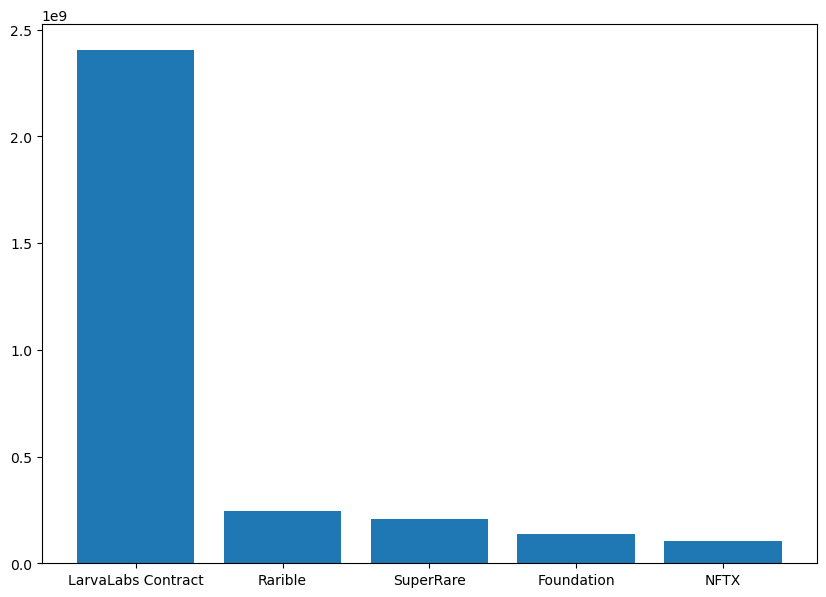

In [18]:
platform = sumfinal['platform']
sums = sumfinal['sum']
fig = plt.figure(figsize =(10, 7))
plt.bar(platform, sums)
plt.show()

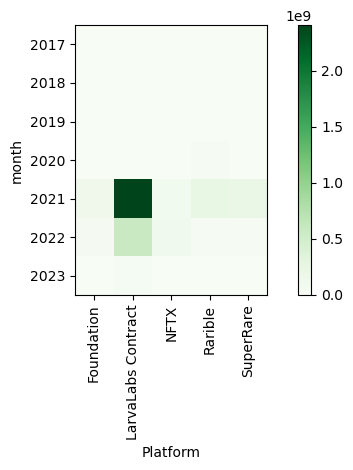

In [19]:
piv = pd.pivot_table(sumfinal, values="sum",index=["year"], columns=["platform"], fill_value=0)
fig, ax = plt.subplots()
im = ax.imshow(piv, cmap="Greens")
fig.colorbar(im, ax=ax)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(piv.columns, rotation=90)
ax.set_yticklabels(piv.index)
ax.set_xlabel("Platform")
ax.set_ylabel("month")

plt.tight_layout()
plt.show()

# by trade

In [91]:
tradeWise = 'popularPlatformsByTrade.csv'
dfm = pd.read_csv(tradeWise)
dfm['DATE'] = pd.to_datetime(dfm['day']).dt.date
dfm['day_t'] = dfm['DATE'].apply(lambda x: x.strftime('%-d')) 
dfm['month'] = dfm['DATE'].apply(lambda x: x.strftime('%-m')) 
dfm['year'] = dfm['DATE'].apply(lambda x: x.strftime('%Y')) 
dfm['DayOfYear'] = dfm['DATE'].apply(lambda x: x.strftime('%-j')) 
dfm['DayOfYear'] = dfm['DATE'].apply(lambda x: x.strftime('%A'))



In [92]:
tradet = dfm.pivot_table('popular', ['year', 'platform'], aggfunc='sum').reset_index()
trader = tradet[tradet.platform != "OpenSea"]
tradefinal = trader[sumt.platform != "LooksRare"]


tradefinal.sort_values(by="popular",ascending=False)

,year,platform,popular
15,2021,Rarible,193659
20,2022,NFTX,171583
9,2020,Rarible,86643
11,2021,Foundation,50236
17,2022,Foundation,47011
13,2021,NFTX,46199
22,2022,Rarible,20141
16,2021,SuperRare,13665
27,2023,NFTX,12768
12,2021,LarvaLabs Contract,12077


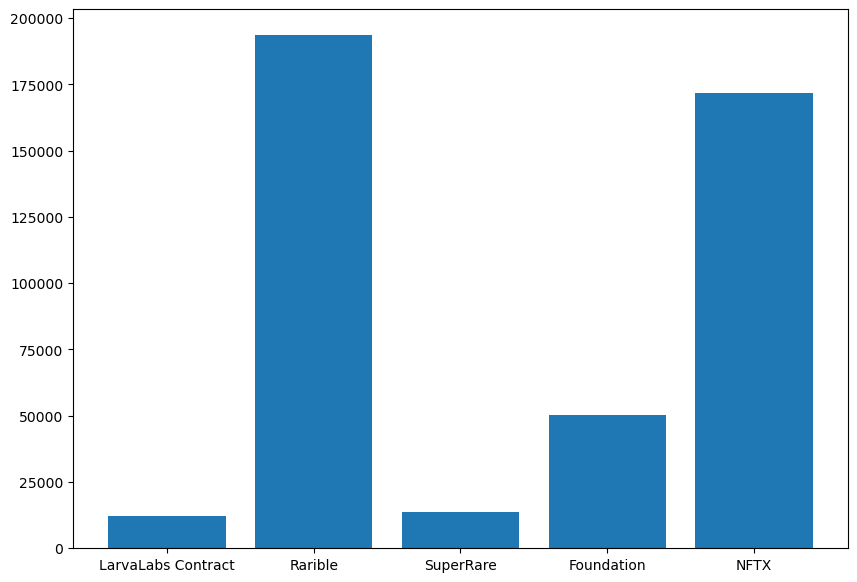

In [93]:
platform = tradefinal['platform']
tradeCount = tradefinal['popular']
fig = plt.figure(figsize =(10, 7))
plt.bar(platform, tradeCount)
plt.show()

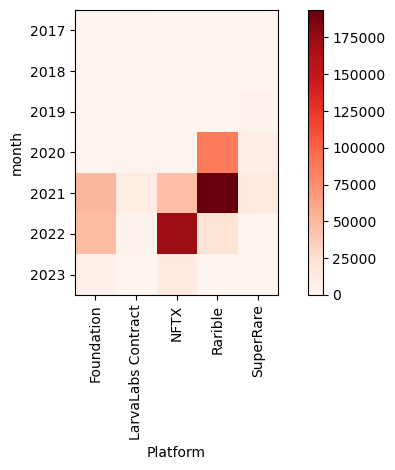

In [95]:
piv = pd.pivot_table(tradefinal, values="popular",index=["year"], columns=["platform"], fill_value=0)
fig, ax = plt.subplots()
im = ax.imshow(piv, cmap="Reds")
fig.colorbar(im, ax=ax)

ax.set_xticks(range(len(piv.columns)))
ax.set_yticks(range(len(piv.index)))
ax.set_xticklabels(piv.columns, rotation=90)
ax.set_yticklabels(piv.index)
ax.set_xlabel("Platform")
ax.set_ylabel("month")

plt.tight_layout()
plt.show()